# Домашняя работа №2
## Кузьмиченко Полина Б06-901
### задачи 2 и 3

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import optimize
from scipy.integrate import solve_ivp


Уравнение Ван-дер-Поля

$y'' +a(y^2 - 1)y' + y = 0$,

$y(0) = y_{0} > 0, y'(0) = 0, 0 \leq t \leq 30, a>0 (100\div 1000)$

описывает нелинейные колебания в различных системах.

**1.** Проинтегрировать уравнение численно явными методами Рунге–Кутты с числом стадий 2, 3 и 4 с процедурой автоматического выбора шага.
*Указание: представить уравнение в виде системы*

$y' = - p$

$p' = ap(y^2 - 1) + y$ 


*или в виде (представление Льенара)*

$y' = -a(\frac{y^3}{3}-y)+p$,

$p' = - y$

Решение является периодической функцией. Параметр а определяет период и максимум
производной решения. Типовое решение, полученное методами Рунге-Кутты, показано ниже

In [11]:
def y(a, y, p):
    return -p
def p(a, y, p):
    return a*p*(y**2 - 1) + y

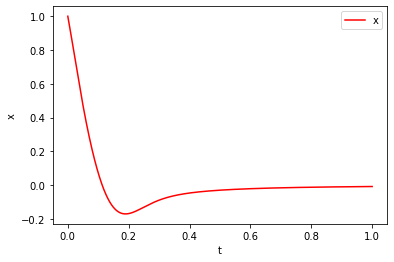

In [28]:

def rk2(f,g,v0,w0,h,T):
    v=[v0]
    w=[w0]
    
    for i in range(1, int(T/h)+1):
        k1 = f(1+(i)*h, v[-1], w[-1]) 
        q1 = g(1+(i)*h, v[-1], w[-1]) 
        
        k2 = f(1+(i)*h + h/2, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        q2 = g(1+(i)*h + h/2, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        
        v.append(v[-1] + h/2*(k1 + k2)) 
        w.append(w[-1] + h/2*(q1 + q2))
    return w 


T_1 = 10
h = 0.001

x= rk2(y,p, 0,1, h, T_1)
t = np.linspace(0,1 , int(T_1/h)+1) 

plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x, "red", label="x")

plt.legend()
plt.show()

   

При этом код устроен так , что a меняется согласно тому , как мне захотелось. Попробуем посмотреть при установлении вполне определенных значений а

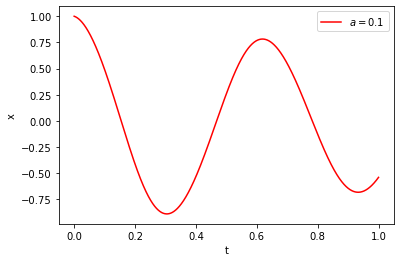

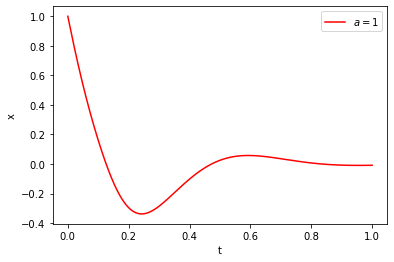

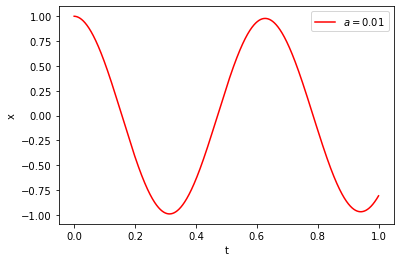

In [30]:
def rk2(f,g,v0,w0,h,T,a):
    v=[v0]
    w=[w0]
    
    for i in range(1, int(T/h)+1):
        k1 = f(a, v[-1], w[-1]) 
        q1 = g(a, v[-1], w[-1]) 
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        
        v.append(v[-1] + h/2*(k1 + k2)) 
        w.append(w[-1] + h/2*(q1 + q2))
    return w 

T=10
for a, h in zip([0.1 , 1, 0.01 ], [0.001 , 0.001, 0.001]): 
    x= rk2(y,p, 0,1, h, T ,a)
    t = np.linspace(0,1 , int(T/h)+1) 
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(t, x, "red", label = r'$a = {}$'.format(a))
    plt.legend()
    plt.show()

   

При достаточно больших a , сложно подобрать достаточный шаг 
Теперь проделаю такие же манипуляции с другими методами РГ

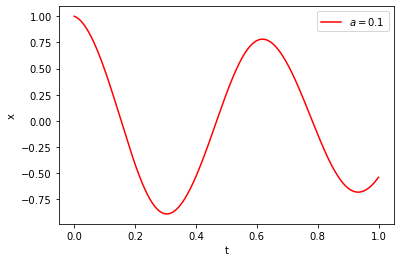

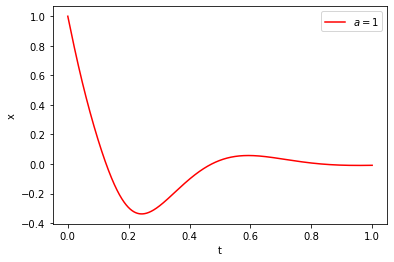

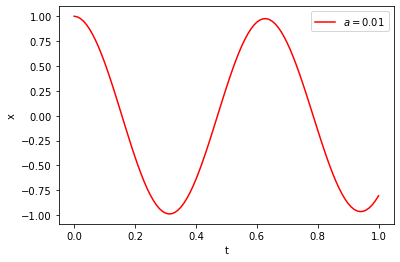

In [34]:
def rk3(f, g, v0, w0, h, T,a): 
    v = [v0] 
    w = [w0] 

    for i in range(1, int(T/h)+1): 
        k1 = f(a, v[-1], w[-1]) 
        q1 = g(a, v[-1], w[-1])
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        
        k3 = f(a, v[-1] -h*k1 + 2*h*k2, w[-1] -h*q1 + 2*h*q2) 
        q3 = g(a, v[-1] -h*k1 + 2*h*k2, w[-1] -h*q1 + 2*h*q2) 
        

        v.append(v[-1] + h/6*(k1 + 4*k2 + k3)) 
        w.append(w[-1] + h/6*(q1 + 4*q2 + q3)) 

    return w

T=10
for a, h in zip([0.1 , 1, 0.01 ], [0.01, 0.001, 0.1]): 
    x= rk3(y,p, 0 , 1, h, T ,a)
    t = np.linspace(0 , 1 , int(T/h)+1) 
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(t, x, "red", label = r'$a = {}$'.format(a))
    plt.legend()
    plt.show()


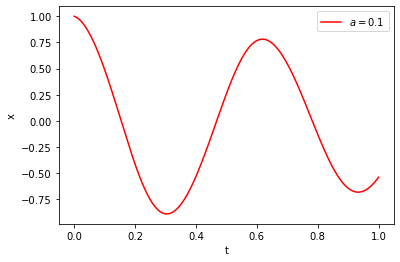

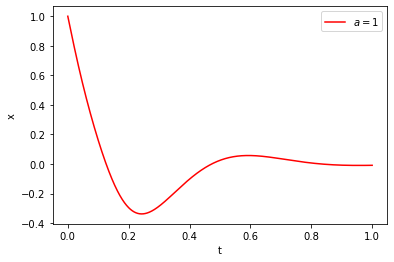

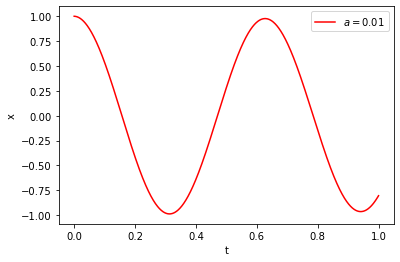

In [36]:
def rk4(f, g, v0, w0, h, T,a):
    v = [v0]
    w = [w0]
    for i in range(1, int(T/h)+1):
        k1 = f(a, v[-1], w[-1])
        q1 = g(a, v[-1], w[-1])
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1)
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1)
        
        k3 = f(a, v[-1] + h/2*k2, w[-1] + h/2*q2)
        q3 = g(a, v[-1] + h/2*k2, w[-1] + h/2*q2)
        
        k4 = f(a, v[-1] + h*k3, w[-1] + h*q3)
        q4 = g(a, v[-1] + h*k3, w[-1] + h*q3)
        
        v.append(v[-1] + h/6*(k1 + 2*k2 + 2*k3 + k4))
        w.append(w[-1] + h/6*(q1 + 2*q2 + 2*q3 + q4))
        
    return w

T=10
h=0.01
for a in [0.1 , 1, 0.01 ]: 
    x= rk4(y,p, 0 , 1, h, T ,a)
    t = np.linspace(0 , 1 , int(T/h)+1) 
    plt.xlabel('t')
    plt.ylabel('x')
    plt.plot(t, x, "red", label = r'$a = {}$'.format(a))
    plt.legend()
    plt.show()

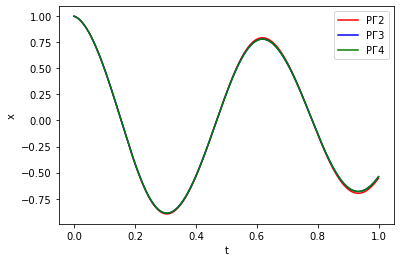

In [40]:
a = 0.1
T = 10
h = 0.01
t = np.linspace(0 , 1 , int(T/h)+1) 
x4 = rk4(y,p, 0 , 1, h, T ,a)
x3 = rk3(y,p, 0 , 1, h, T ,a)
x2 = rk2(y,p, 0 , 1, h, T ,a)
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, x2, "red", label ="РГ2")
plt.plot(t, x3, "blue", label = "РГ3")
plt.plot(t, x4, "green", label = "РГ4")
plt.legend()
plt.show()

В привиденных выше решениях я еще кое-что упростила , я сама выбрала y0

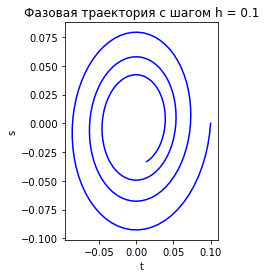

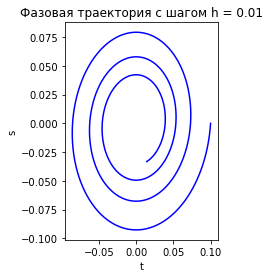

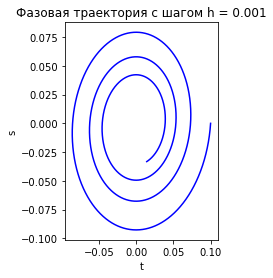

In [46]:
def rk4(f, g, v0, w0, h, T,a):
    v = [v0]
    w = [w0]
    for i in range(1, int(T/h)+1):
        k1 = f(a, v[-1], w[-1])
        q1 = g(a, v[-1], w[-1])
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1)
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1)
        
        k3 = f(a, v[-1] + h/2*k2, w[-1] + h/2*q2)
        q3 = g(a, v[-1] + h/2*k2, w[-1] + h/2*q2)
        
        k4 = f(a, v[-1] + h*k3, w[-1] + h*q3)
        q4 = g(a, v[-1] + h*k3, w[-1] + h*q3)
        
        v.append(v[-1] + h/6*(k1 + 2*k2 + 2*k3 + k4))
        w.append(w[-1] + h/6*(q1 + 2*q2 + 2*q3 + q4))
        
    return w,v
a = 0.1
T = 20
for h in [0.1 , 0.01 ,0.001] :
    x1, y1 = rk4( y,p, 0 , 0.1 , h, T ,a)
    plt.subplot(1,2,2)
    str_1 = 'Фазовая траектория с шагом h = ' + str(h)
    plt.title(str_1)
    plt.xlabel('t')
    plt.ylabel('s')
    plt.plot(x1, y1, "blue")
    plt.show()




Пока я игралась с значением y0 я поняла , что он не должен быть слишком большим, иначе считать программа не будет 

Сравним фазовые траектории для разных Рунге - Кутты 

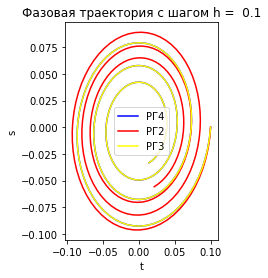

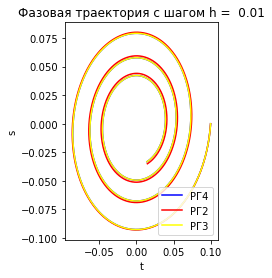

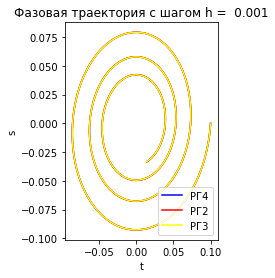

In [59]:
def rk3(f, g, v0, w0, h, T,a): 
    v = [v0] 
    w = [w0] 

    for i in range(1, int(T/h)+1): 
        k1 = f(a, v[-1], w[-1]) 
        q1 = g(a, v[-1], w[-1])
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        
        k3 = f(a, v[-1] -h*k1 + 2*h*k2, w[-1] -h*q1 + 2*h*q2) 
        q3 = g(a, v[-1] -h*k1 + 2*h*k2, w[-1] -h*q1 + 2*h*q2) 
        

        v.append(v[-1] + h/6*(k1 + 4*k2 + k3)) 
        w.append(w[-1] + h/6*(q1 + 4*q2 + q3)) 

    return w , v
def rk2(f,g,v0,w0,h,T,a):
    v=[v0]
    w=[w0]
    
    for i in range(1, int(T/h)+1):
        k1 = f(a, v[-1], w[-1]) 
        q1 = g(a, v[-1], w[-1]) 
        
        k2 = f(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        q2 = g(a, v[-1] + h/2*k1, w[-1] + h/2*q1) 
        
        v.append(v[-1] + h/2*(k1 + k2)) 
        w.append(w[-1] + h/2*(q1 + q2))
    return w , v
a=0.1
T = 20
for h in [0.1 , 0.01 ,0.001] :
    x1, y1 = rk4( y,p, 0 , 0.1 , h, T ,a)
    x2,y2 = rk2( y,p, 0 , 0.1 , h, T ,a)
    x3, y3 = rk3( y,p, 0 , 0.1 , h, T ,a)
    plt.subplot(1,2,2)
    str_1 = 'Фазовая траектория с шагом h =  ' + str(h)
    plt.title(str_1)
    plt.xlabel('t')
    plt.ylabel('s')
    plt.plot(x1, y1, "blue", label = "РГ4")
    plt.plot(x2,y2 ,"red", label = "РГ2")
    plt.plot(x3,y3 ,"yellow", label = "РГ3")
    plt.legend()
    plt.show()
    

еще интересно менять значения a  

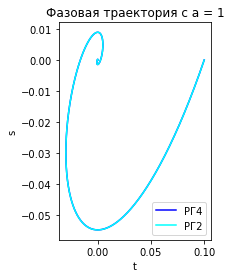

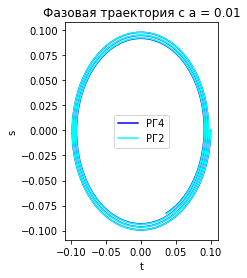

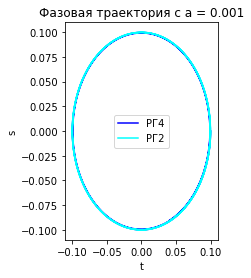

In [73]:
h=0.001
T = 20
for a in [1 , 0.01 , 0.001] :
    x1, y1 = rk4( y,p, 0 , 0.1 , h, T ,a)
    x2,y2 = rk2( y,p, 0 , 0.1 , h, T ,a)
    plt.subplot(1,2,2)
    str_1 = 'Фазовая траектория с a = ' + str(a)
    plt.title(str_1)
    plt.xlabel('t')
    plt.ylabel('s')
    plt.plot(x1, y1, "blue", label= "РГ4")
    plt.plot(x2, y2, "aqua",label= "РГ2")
    plt.legend()
    plt.show()

## Задача 3
Модель свертывания крови. Система ОДУ,
описывающая динамику образования основных метаболитов в реакции свертывания крови:

$$
\frac{\delta u_1}{\delta t} = K_1u_1u_2(1 - u_1)\frac{(1+K_2u_1)}{1+K_3u_3} - u_1
$$
$$
\frac{\delta u_2}{\delta t} = u_1 = K_4u_2 
$$
$$
\frac{\delta u_3}{\delta t} = K_5u_1^2 - K_6u_3
$$

Особые точки точки рассматриваемой системы определяются корнями следующего полинома:

$$
f(u_1) = u_1\left(\frac{K_1K_2}{K_4}u_1^3 + \left(\frac{K_1}{K_4}(1-K_2) + \frac{K_3K_5}{K_6}\right)u_1^2 - \frac{K_1}{K_4}u_1 + 1\right)
$$

В системе всегда существует нулевая особая точка. Она устойчива при любых
значениях параметров. Кроме того, у рассматриваемого полинома всегда есть один
отрицательный корень. Соответственно, количество его положительных действительных
корней, определяющих особые точки системы, может меняться в зависимости от
параметров модели от нуля до двух.

Удобно рассматривать поведение системы при изменении параметра
, K2
определяющего скорость наработки активатора и параметра
, K6
определяющего скорость
инактивации ингибитора, поскольку от
K2
зависит только первое уравнение системы, от
K6 — только третье.

Построим бифуркационную диаграмму в диапазоне изменения параметра
K6
от 0 до
0,2 при фиксированном значении
 K2.


До значения
K6 = 0,0173
в системе существует единственная особая точка — нулевая.
При
K6 >0,0173
рождаются еще две особые точки. Первая из них является неустойчивой
(при
K6 < 0,193 — это седло-узел, при
K6 > 0,193 — седло-фокус). При увеличении
значения параметра
K6
происходит уменьшение соответствующего значения
 $u_{1 ст}$.
Вторая
особая точка, являющаяся неустойчивой при малых значениях параметра
K6
в результате
бифуркации Хопфа становится устойчивой
(K6 = 0,0692). 
При данном значении параметра
K2
вблизи бифуркации Хопфа в рассматриваемой системе уравнений происходит
бифуркация рождения устойчивого предельного цикла из петли сепаратриссы (осевой
линии) седло-узла. Получить численно петлю сепаратриссы, вычислив предварительно
координаты седловой особой точки.

Как следует из условия будем искать особую точку – при значении $K_6 \approx$ 0.0692. Остальные
коэффициенты из таблицы.

Для начала построим бифуркационную диаграмму в диапазоне изменения параметра
$K_6$
от 0 до
0,2 при фиксированном $K_2$

In [75]:
from sympy import diff, symbols, Symbol, integrate, solve, sqrt, log, sin, cos, lambdify

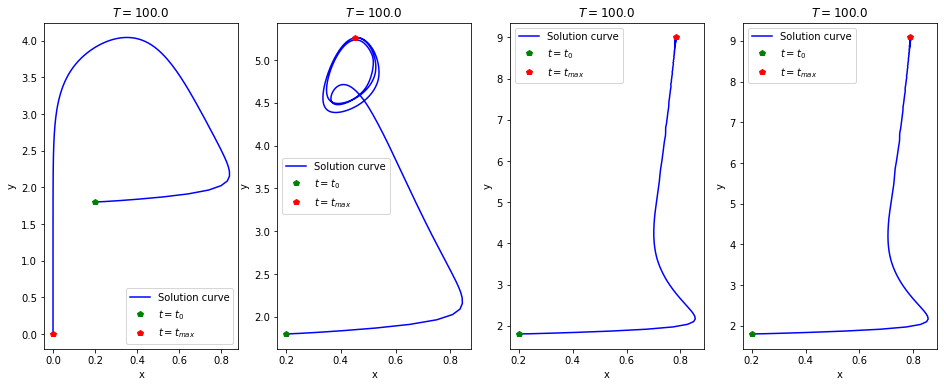

In [83]:
k1 = 6.85
k2 = 11.
k3 = 2.36
k4 = 0.087
k5 = 17.

u_start = np.array([0., 0.2, 1.8, 4]) # для начала попробуем со случайной начальной точкой
t_stop = 100.
fig, axes = plt.subplots(1,4, figsize=(16, 6))
for i, k6 in zip(range(4), [0.0150, 0.0692, 0.193, 0.2]):
    
    system_of_eq = lambda t, u: np.array([
    1.0,
    k1*u[1]*u[2]*(1-u[1])*(1+k2*u[1])/(1+k3*u[3])-u[1],
    u[1] - k4*u[2],
    k5*u[1]**2 - k6*u[3]])
    
    # Метод Дормана - Принса
    prince = solve_ivp(system_of_eq, (u_start[0], t_stop), u_start,
                       method='RK45', t_eval=np.arange(x_start[0], t_stop, 0.1)).y
    # рисунок в проекции на u2 и u1
    plot_lines_2D(axes[i], prince)

В точке $k_6=0.692 $ есть две особые точки с положительными координатами, приближённо:
(0.012, 0.14, 0,037) и (0.45, 5.1, 48). Они были найдены подстановкой уравнения в wolframe .
Экспериментирование с заданием начальной точки показало, что предельный цикл появляется
вокруг второй особой точки, но он виден не при каждой начальной точке – что начальные значения
u2 и u3 следует взять в несколько раз меньше стационарных значений. Ниже привожу несколько
фазовых портретов, и центры циклов действительно имеют координаты, похожие на (0.45, 5.1, 48)

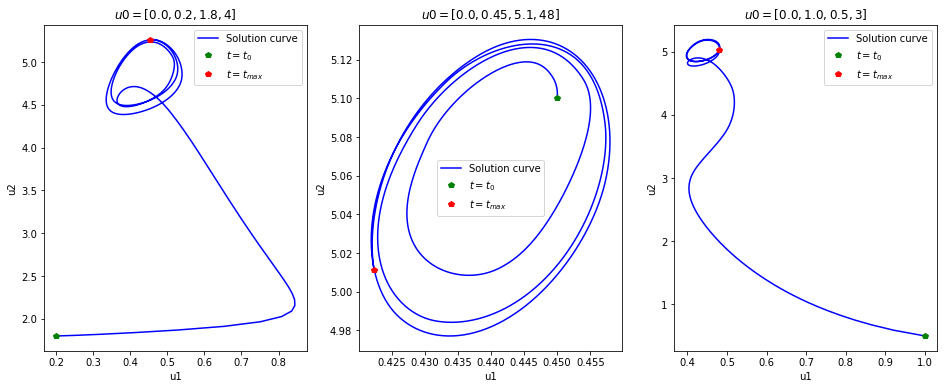

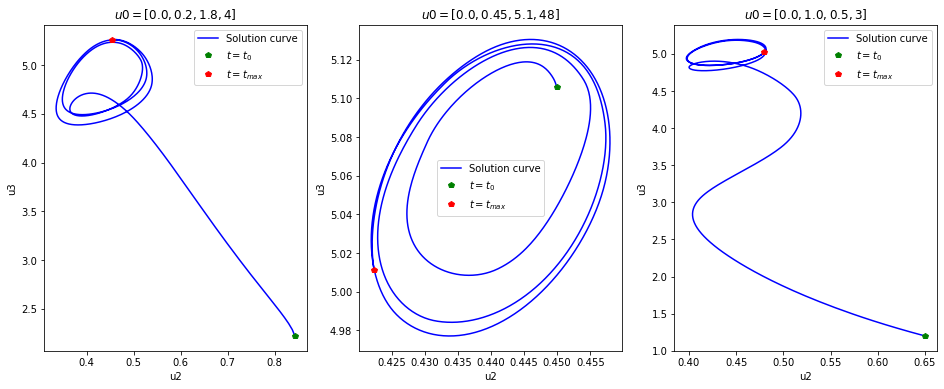

In [86]:
u_starts = [[0., 0.2, 1.8, 4], [0., 0.45, 5.1 , 48], [0., 1.0, 0.5, 3]]
t_stop = 100.
k6 = 0.0692
fig, axes = plt.subplots(1,3, figsize=(16, 6))
for i, u_start in zip(range(3), u_starts):
    system_of_eq = lambda t, u: np.array([
    1.0,
    k1*u[1]*u[2]*(1-u[1])*(1+k2*u[1])/(1+k3*u[3])-u[1],
    u[1] - k4*u[2],
    k5*u[1]**2 - k6*u[3]])

   # Метод Дормана - Принса
    prince = solve_ivp(system_of_eq, (u_start[0], t_stop), u_start,
    method='RK45', t_eval=np.arange(x_start[0], t_stop, 0.1)).y
    # рисунок в проекции на u2 и u1
    plot_lines_2D(axes[i], prince)
    axes[i].set_title("$u0 = {}$".format(u_start))
    axes[i].set_xlabel("u1")
    axes[i].set_ylabel("u2")
fig, axes = plt.subplots(1,3, figsize=(16, 6))
for i, u_start in zip(range(3), u_starts):
    system_of_eq = lambda t, u: np.array([
    1.0,
    k1*u[1]*u[2]*(1-u[1])*(1+k2*u[1])/(1+k3*u[3])-u[1],
    u[1] - k4*u[2],
    k5*u[1]**2 - k6*u[3]])

    # Метод Дормана - Принса
    prince = solve_ivp(system_of_eq, (u_start[0], t_stop), u_start,
    method='RK45', t_eval=np.arange(x_start[1], t_stop, 0.1)).y
    # рисунок в проекции на u2 и u3
    plot_lines_2D(axes[i], prince)
    axes[i].set_title("$u0 = {}$".format(u_start))
    axes[i].set_xlabel("u2")
    axes[i].set_ylabel("u3")